In [1]:
date_format = "yyyy.mm.dd" # 2007.04.05

include("available_datasets.jl") 
dataset_file_name = available_datasets()[14,2] # row 5, column 2 = TPLGX.csv

include("fetch_dataset.jl") 
df = fetch_dataset(dataset_file_name, date_format)

size(df)

usage: df = available_datasets() # returns a DataFrame with all available data sets (name, file_path)
usage: dataset_file_name = available_datasets()[5,2] # 5th dataset: DJIA, 2nd column: file-name

        usage: 
            include("available_datasets.jl") 
            dataset_file_name = available_datasets()[5,2] # row 5, column 2 = DJIA
            df = fetch_dataset(dataset_file_name)
    


(254, 7)

# Condense Date to e.g. Mar'48 on x-axis

- Since multiple rows share one year, using just year makes a choppy graph.
- Since days of the month are missing and are are not evenly spaced, it is bad idea to use them.
- Since we have all the months they make for acceptable values on the x-axis.
- In the future, I might create more granual scale.

In [2]:
dates = df[:,1] # e.g. 1948-03-31

254-element Array{String,1}:
 "2019-09-17"
 "2019-09-18"
 "2019-09-19"
 "2019-09-20"
 "2019-09-23"
 "2019-09-24"
 "2019-09-25"
 "2019-09-26"
 "2019-09-27"
 "2019-09-30"
 "2019-10-01"
 "2019-10-02"
 "2019-10-03"
 ⋮
 "2020-09-01"
 "2020-09-02"
 "2020-09-03"
 "2020-09-04"
 "2020-09-08"
 "2020-09-09"
 "2020-09-10"
 "2020-09-11"
 "2020-09-14"
 "2020-09-15"
 "2020-09-16"
 "2020-09-17"

In [34]:
include("convert_dates.jl")
result = condense_dates(df[:,1]) # "yy/mdd"
result

usage: 
                dates = condense_dates( df[1] ) # ::Array{String,1}
                dates = condense_dates( df[1], "mm/dd/yyy" ) # ::Array{String,1}
        


254-element Array{String,1}:
 "19/917"
 "19/918"
 "19/919"
 "19/920"
 "19/923"
 "19/924"
 "19/925"
 "19/926"
 "19/927"
 "19/930"
 "19/1001"
 "19/1002"
 "19/1003"
 ⋮
 "20/901"
 "20/902"
 "20/903"
 "20/904"
 "20/908"
 "20/909"
 "20/910"
 "20/911"
 "20/914"
 "20/915"
 "20/916"
 "20/917"

In [29]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


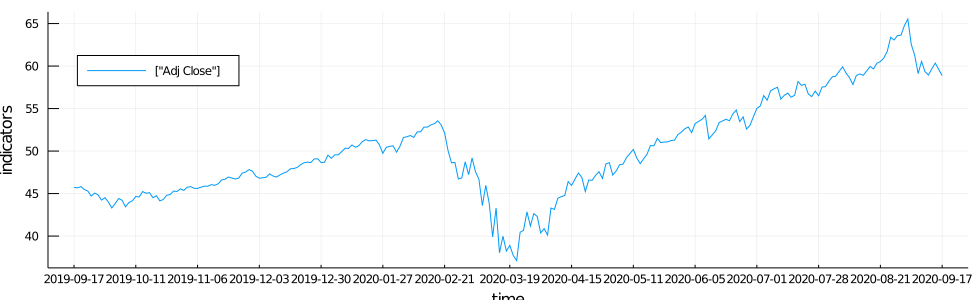

In [30]:
using Plots

gr()
plot(df[:,1 ], 
    [           df[:,6]   ], 
    label    = [columns[6]   ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 300), # width, height
    layout = (1, 1)
    )

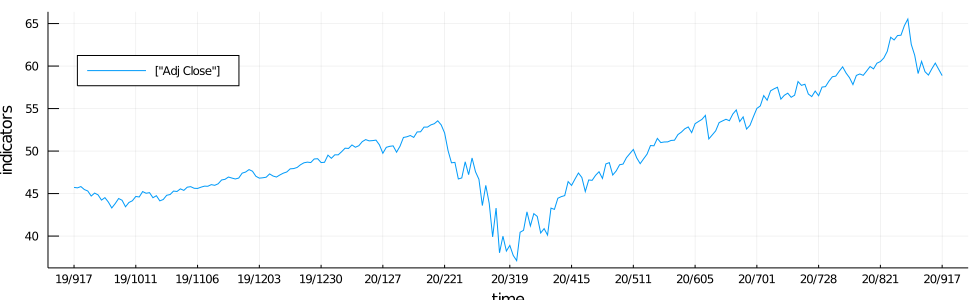

In [31]:
using Plots

gr()
plot(result, 
    [           df[:,6]   ], 
    label    = [columns[6]   ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 300), # width, height
    layout = (1, 1)
    )